# Import Libs 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
## Get the data
# #1. Read the csv
# 2. Save as pandas df
# 3. Visualize the data
# 4. Clean the data

dataset = pd.read_csv("kyphosis.csv")
dataset.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [44]:
import seaborn as sns

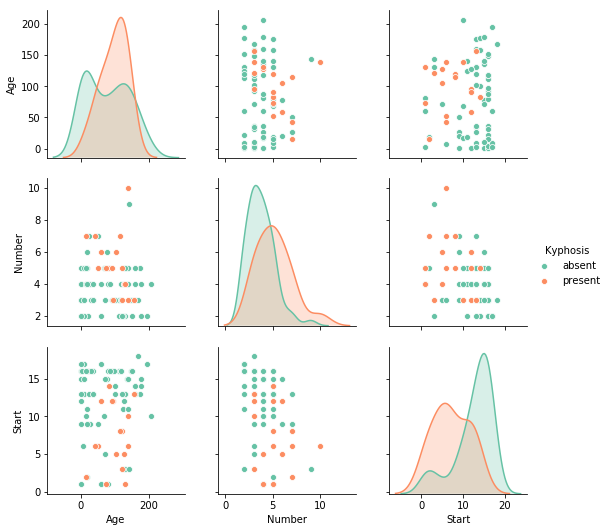

In [45]:
sns.pairplot(dataset, hue='Kyphosis',
              palette = 'Set2')

In [46]:
# sns.__version__

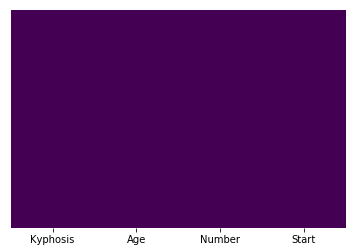

In [47]:
sns.heatmap(dataset.isnull(), yticklabels=False,
           cbar=False, cmap='viridis')

In [48]:
# sns.set_style('whitegrid')
# sns.countplot(X='Kyphosis',data = 'dataset', palette='RdBu_r')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# X = dataset.head(12)
X = dataset[["Age","Number","Start"]]
y = dataset['Kyphosis']

In [51]:
X_train,X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.30,random_state = 2)

In [52]:
len(X_train)

56

In [53]:
len(X_test)

25

In [54]:
len(dataset)

81

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
predictions = dtree.predict(X_test)

In [59]:
my_preds = pd.DataFrame(predictions)

In [62]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
df_row = pd.concat([my_preds, y_test], axis=1)
# df_row

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
print(confusion_matrix(y_test,predictions))

[[16  5]
 [ 2  2]]


In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.89      0.76      0.82        21
     present       0.29      0.50      0.36         4

   micro avg       0.72      0.72      0.72        25
   macro avg       0.59      0.63      0.59        25
weighted avg       0.79      0.72      0.75        25



In [73]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(dataset.columns[1:])
features

['Age', 'Number', 'Start']

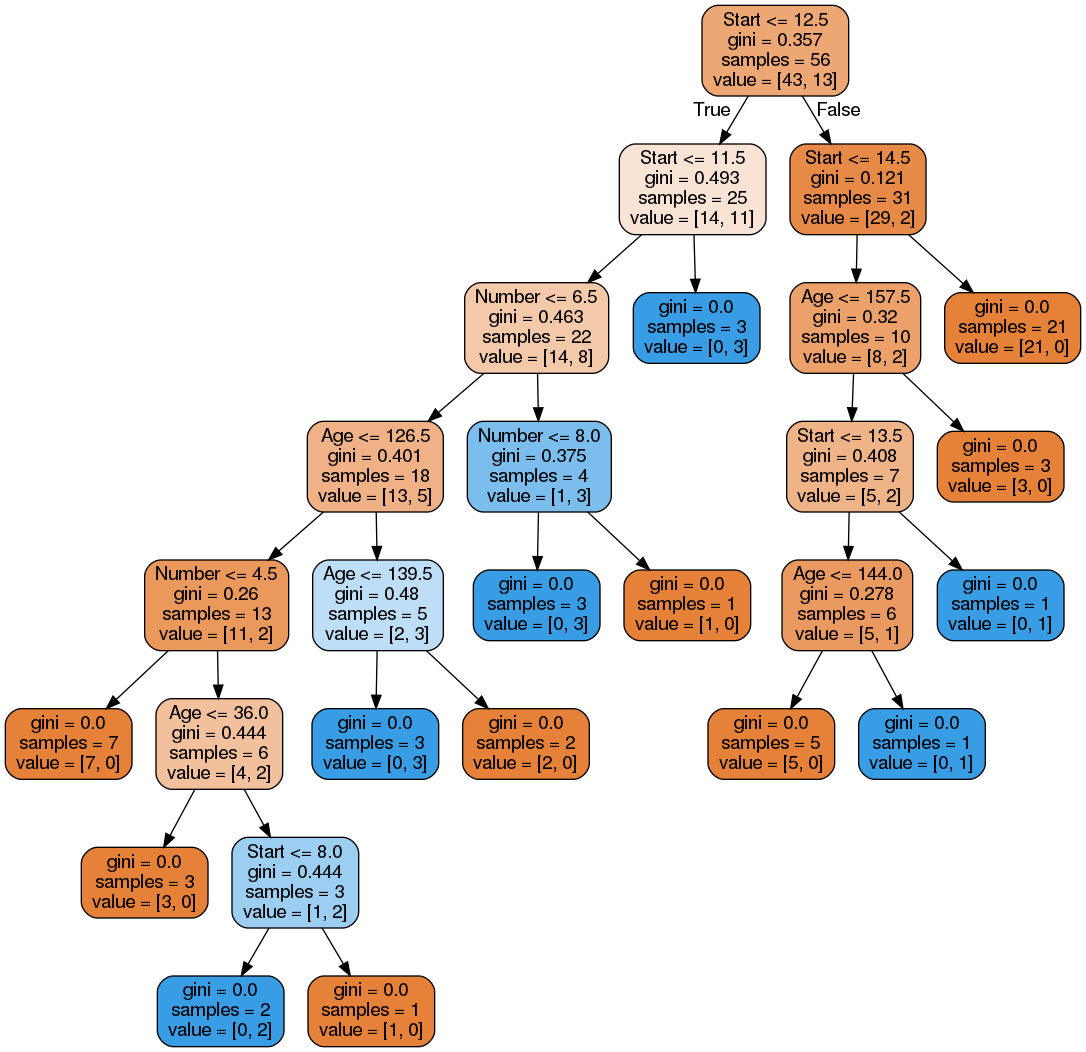

In [78]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                feature_names=features,filled=True,
               rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_prd = rfc.predict(X_test)
print(classification_report(y_test,rfc_prd))

              precision    recall  f1-score   support

      absent       1.00      0.90      0.95        21
     present       0.67      1.00      0.80         4

   micro avg       0.92      0.92      0.92        25
   macro avg       0.83      0.95      0.88        25
weighted avg       0.95      0.92      0.93        25

